<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/classification/classificazione_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione Binaria

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
random_seed = 0

In [ ]:
x, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_repeated=0,
    random_state=random_seed)

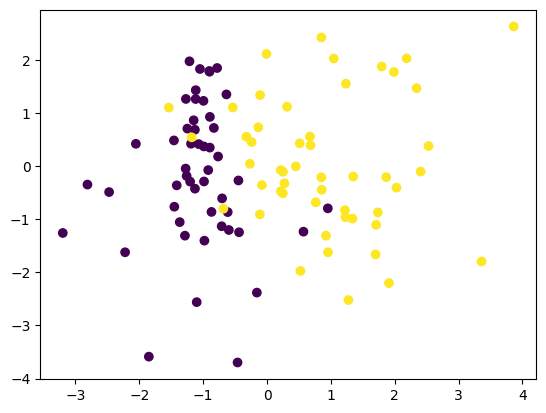

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y)

## Creo il modello

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=.3,
    random_state=random_seed)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

## Visualizzo il Decision Boundary

In [ ]:
def plot_decision_boundary(model, datasets):

  x, y = datasets

  h = .02

  x_min, x_max = x[:, 0].min()-.1, x[:, 0].max()+.1
  y_min, y_max = x[:, 1].min()-.1, x[:, 1].max()+.1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # meshgrid crea coordinate di punti
                       np.arange(y_min, y_max, h))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel esegue il fluttering di dati
                                                   # (da multi a monodimensionale)
                                                   # serve per costruire le osservazioni da passare
                                                   # al modello per la classificazione

  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.Paired) # serve per disegnare dei contorni riempiti
                                              # (prende in input gli array per la griglia e z per
                                              # definire il colore di ogni punto)

  x_m = x[y==1]
  x_b = x[y==0]
  plt.scatter(x_b[:, 0], x_b[:, 1], c="green",  edgecolor='white')
  plt.scatter(x_m[:, 0], x_m[:, 1], c="red",  edgecolor='white')

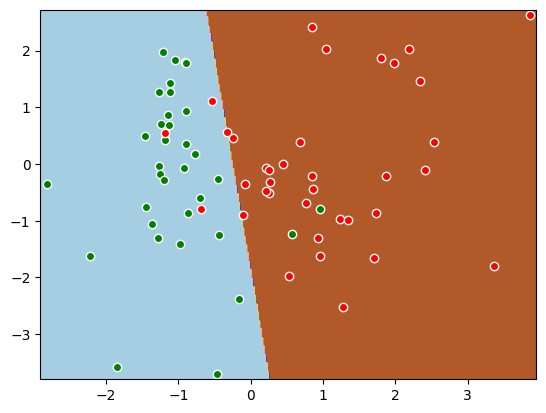

In [ ]:
plot_decision_boundary(lr, (x_train,y_train))

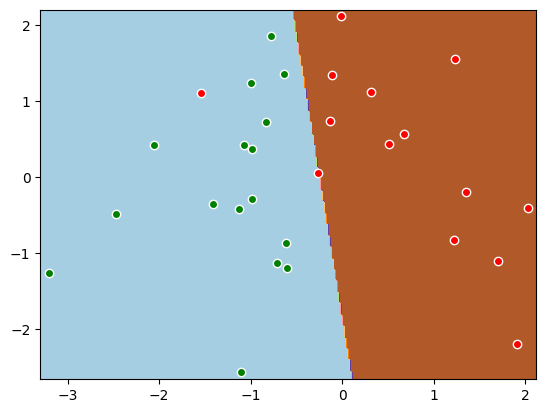

In [ ]:
plot_decision_boundary(lr, (x_test,y_test))

## Valuto il modello

### Log loss

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
y_proba_train = lr.predict_proba(x_train)
y_proba_test = lr.predict_proba(x_test)

In [ ]:
log_loss(y_train, y_proba_train)

0.28399556725325115

In [ ]:
log_loss(y_test, y_proba_test)

0.26994466775678566

### Matrice di confusione

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[32,  2],
       [ 4, 32]])

<Axes: >

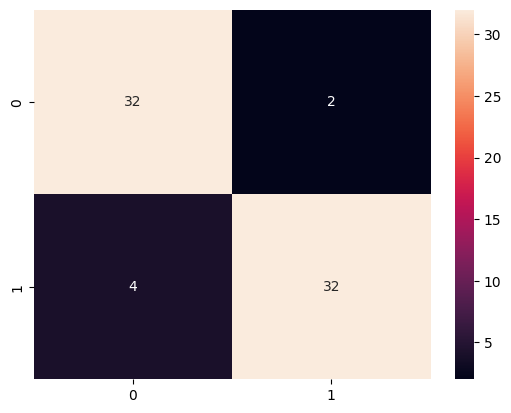

In [ ]:
import seaborn as sns
import pandas as pd

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [ ]:
def plot_confusion_matrix(y_true, y_pred):

  cm = confusion_matrix(y_true, y_pred)

  df_cm = pd.DataFrame(cm,
                       index = ['Negative', 'Positive'],
                       columns = ['Predictive Negative', 'Predictive Positive'])

  sns.heatmap(df_cm, annot=True)

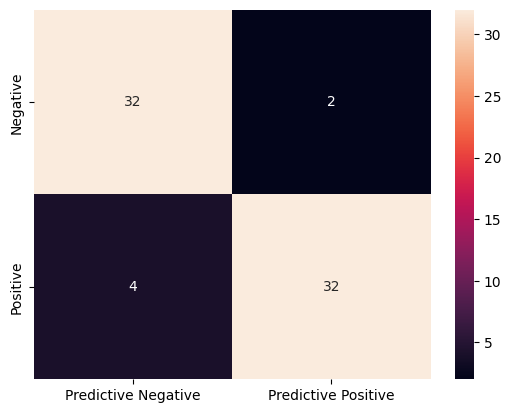

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

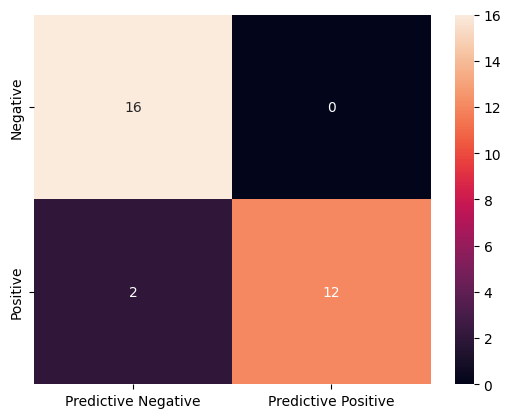

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)